In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Found 105 images belonging to 3 classes.
Found 15 images belonging to 3 classes.
Found 15 images belonging to 3 classes.
Classes detected by generator: {'bonda': 0, 'vada': 1, 'cutlet': 2}


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,940,355 (49.36 MB)

 Trainable params: 12,940,355 (49.36 MB)

 Non-trainable params: 0 (0.00 B)


Starting model training...
Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 56s 17s/step - accuracy: 0.3247 - loss: 6.4703 - val_accuracy: 0.3333 - val_loss: 1.1153
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 18s 4s/step - accuracy: 0.3383 - loss: 1.3973 - val_accuracy: 0.5333 - val_loss: 1.0984
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - accuracy: 0.4327 - loss: 1.0931 - val_accuracy: 0.3333 - val_loss: 1.0980
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - accuracy: 0.3441 - loss: 1.0955 - val_accuracy: 0.5333 - val_loss: 1.0913
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - accuracy: 0.4498 - loss: 1.0917 - val_accuracy: 0.3333 - val_loss: 1.0886
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 4s/step - accuracy: 0.3872 - loss: 1.0863 - val_accuracy: 0.6000 - val_loss: 1.0852
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 4s/step - accuracy: 0.4859 - loss: 1.0808 - val_accuracy: 0.6000 - val_loss: 1.0668
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 4s/step - accuracy: 0.4641 - loss: 1.0634 - val_accuracy: 0.666

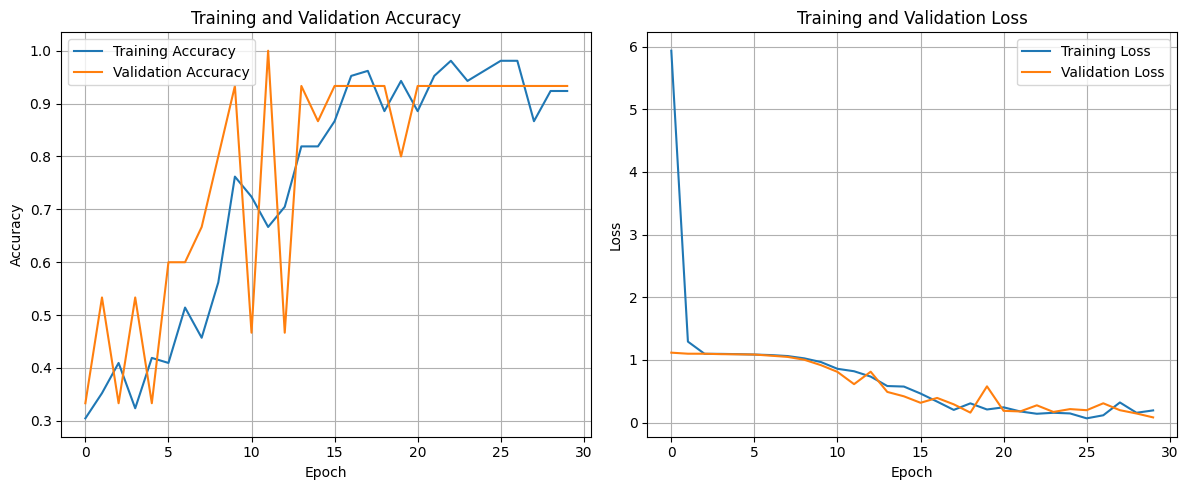


Demonstrating prediction on a new photo...

Predicting for image: /content/drive/My Drive/cia/test/bonda/IMG_20250817_195835667.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
Predicted Class: bonda
Confidence: 1.00
All class probabilities:
  bonda: 0.9989
  vada: 0.0001
  cutlet: 0.0010


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np
import os
import matplotlib.pyplot as plt
import pathlib
import random


data_dir = pathlib.Path('/content/drive/My Drive/cia') # <--- UPDATED PATH for Google Drive

train_dir = data_dir / 'train'
validation_dir = data_dir / 'validation'
test_dir = data_dir / 'test'

# Define your actual class names (must match your folder names exactly)
class_names = ['bonda', 'vada', 'cutlet'] # These are your specific class names
num_classes = len(class_names)



# Image dimensions and batch size
IMG_HEIGHT = 128
IMG_WIDTH = 128
BATCH_SIZE = 32

# Data augmentation and preprocessing for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,          # Normalize pixel values to [0, 1]
    rotation_range=20,       # Random rotations (degrees)
    width_shift_range=0.2,   # Random horizontal shifts (fraction of total width)
    height_shift_range=0.2,  # Random vertical shifts (fraction of total height)
    shear_range=0.2,         # Shear transformations
    zoom_range=0.2,          # Random zooms
    horizontal_flip=True,    # Random horizontal flips
    fill_mode='nearest'      # Strategy for filling in new pixels created by transformations
)

# Only rescale validation and test data (no augmentation)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical', # For multi-class classification (one-hot encoding labels)
    classes=class_names,      # Explicitly state your class names to ensure order
    seed=42                   # For reproducibility
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    classes=class_names,
    seed=42
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    classes=class_names,
    seed=42,
    shuffle=False # Keep data in order for consistent evaluation
)

print(f"Classes detected by generator: {train_generator.class_indices}")

# --- 2. CNN Model Definition ---

model = Sequential([
    # First Convolutional Block
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D((2, 2)), # Reduces feature map size by half
    Dropout(0.25),         # Regularization to prevent overfitting

    # Second Convolutional Block
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Third Convolutional Block
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Flatten Layer: Converts 3D feature maps to 1D vector for Dense layers
    Flatten(),

    # First Dense (Fully Connected) Layer
    Dense(512, activation='relu'),
    Dropout(0.5), # Higher dropout for dense layers

    # Output Layer: Outputs probabilities for each class
    # 'softmax' activation ensures probabilities sum to 1
    Dense(num_classes, activation='softmax')
])

# Compile the model: Configure the training process
model.compile(optimizer=Adam(learning_rate=0.001), # Adam optimizer with a specific learning rate
              loss='categorical_crossentropy',     # Loss function suitable for multi-class classification
              metrics=['accuracy'])                # Metric to track during training

# Print a summary of the model's layers and parameters
model.summary()

# --- 3. Training the Model ---
EPOCHS = 30 # Increased epochs for better training, feel free to adjust further

print("\nStarting model training...")
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator,
    verbose=1 # Show detailed training progress
)
print("Model training finished.")

# --- 4. Testing/Evaluation ---
print("\nEvaluating model on test data...")
test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print("Model evaluation finished.")

# Plot training history (Accuracy and Loss curves)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- 5. Prediction on a New Photo ---
print("\nDemonstrating prediction on a new photo...")

def predict_single_image(model, image_path, target_size, class_names):
    from tensorflow.keras.preprocessing import image
    try:
        # Load and preprocess the image for prediction
        img = image.load_img(image_path, target_size=target_size)
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0) # Add batch dimension
        img_array /= 255.0 # Normalize

        predictions = model.predict(img_array)
        predicted_class_index = np.argmax(predictions[0])
        predicted_class_name = class_names[predicted_class_index]
        confidence = predictions[0][predicted_class_index]

        return predicted_class_name, confidence, predictions[0]
    except FileNotFoundError:
        print(f"Error: Image not found at {image_path}")
        return None, None, None
    except Exception as e:
        print(f"An error occurred during prediction: {e}")
        return None, None, None

# Example usage: Predict one of the test images
example_image_path = None
try:
    # Attempt to find a random JPG or PNG from the 'bonda' class in your test set
    # Adjust 'bonda' to another class name if you prefer a different example
    target_class_for_example = 'bonda'
    example_test_dir = test_dir / target_class_for_example
    image_files = list(example_test_dir.glob('*.jpg')) + \
                  list(example_test_dir.glob('*.png'))
    if image_files:
        example_image_path = random.choice(image_files)
    else:
        print(f"No JPG or PNG images found in {example_test_dir}. Cannot demonstrate prediction.")
except Exception as e:
    print(f"An error occurred while trying to find an example image for prediction: {e}")


if example_image_path:
    print(f"\nPredicting for image: {example_image_path}")
    predicted_class, confidence, all_predictions = predict_single_image(model, str(example_image_path), (IMG_HEIGHT, IMG_WIDTH), class_names)

    if predicted_class:
        print(f"Predicted Class: {predicted_class}")
        print(f"Confidence: {confidence:.2f}")
        print("All class probabilities:")
        for i, prob in enumerate(all_predictions):
            print(f"  {class_names[i]}: {prob:.4f}")
    else:
        print("Could not make a prediction for the example image.")
else:
    print("No example image path available for prediction demonstration. Please ensure your test directory contains images.")


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import pathlib
from google.colab import files
import os # For checking if the uploaded file exists

# --- IMPORTANT Setup: Define these based on your trained model and data ---
# Make sure these match the settings used during your model's training!
IMG_HEIGHT = 128
IMG_WIDTH = 128
class_names = ['bonda', 'vada', 'cutlet'] # Your specific class names

# --- Load Your Trained Model (Replace with your actual model loading) ---
# In a real scenario, you would save your model after training (e.g., model.save('my_food_classifier.h5'))
# And then load it here. For demonstration, we'll recreate a dummy model structure.
# If you are running this *after* training the full CNN code in the same session,
# the 'model' object will already be in memory, and you can skip this section.

# Define a dummy model structure matching your trained model, if not loaded
# In a real application, you would load your actual trained weights.
try:
    # Attempt to use the 'model' object if it's already defined from previous cells
    _ = model.summary()
    print("Reusing existing model object.")
except NameError:
    print("Model not found in memory. Defining a dummy model structure for demonstration.")
    # This dummy model needs to match the structure of your *trained* model
    # just enough to define its input/output layers for prediction.
    # It won't have trained weights unless loaded.
    num_classes = len(class_names)
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    # If using this standalone, you MUST load weights:
    # model.load_weights('path_to_your_saved_weights.h5')
    print("Dummy model structure defined. Remember to load actual weights if running standalone.")


# --- Prediction Function ---
def predict_single_image(model, image_path, target_size, class_names):
    """
    Loads an image, preprocesses it, and makes a prediction using the trained model.
    """
    try:
        # Load the image and resize it to the target dimensions
        img = image.load_img(image_path, target_size=target_size)
        # Convert the image to a NumPy array
        img_array = image.img_to_array(img)
        # Add an extra dimension to create a batch of 1 image (expected by model.predict)
        img_array = np.expand_dims(img_array, axis=0)
        # Normalize pixel values (scale from 0-255 to 0-1), same as training
        img_array /= 255.0

        # Make prediction using the trained model
        predictions = model.predict(img_array)
        # Get the index of the class with the highest probability
        predicted_class_index = np.argmax(predictions[0])
        # Get the name of the predicted class
        predicted_class_name = class_names[predicted_class_index]
        # Get the confidence (probability) for the predicted class
        confidence = predictions[0][predicted_class_index]

        return predicted_class_name, confidence, predictions[0]
    except FileNotFoundError:
        print(f"Error: Image not found at {image_path}")
        return None, None, None
    except Exception as e:
        print(f"An error occurred during prediction: {e}")
        return None, None, None

# --- Main Prediction Logic for Desktop Upload ---

print("\n--- Single Image Prediction from Desktop ---")
print("Instructions:")
print("1. A file upload dialog will appear below. Select ONE image from your desktop.")
print("2. Wait for the upload to complete. The filename will be printed.")
print("3. The model will then attempt to classify this uploaded image.")

uploaded_image_filename = None

try:
    # This line will open a file selection dialog
    uploaded = files.upload()
    if uploaded:
        # Get the first (and hopefully only) uploaded filename
        uploaded_image_filename = list(uploaded.keys())[0]
        print(f"Uploaded file: {uploaded_image_filename}")
    else:
        print("No file was uploaded.")
except Exception as e:
    print(f"An error occurred during file upload: {e}")
    print("Ensure you are running this in a Google Colab environment and have selected a file.")

if uploaded_image_filename:
    # Construct the full path to the uploaded image in Colab's temporary storage
    uploaded_image_path = pathlib.Path('/content/') / uploaded_image_filename

    # Verify the file actually exists at the expected path
    if uploaded_image_path.exists():
        print(f"\nPredicting for image: {uploaded_image_path}")
        predicted_class, confidence, all_predictions = predict_single_image(
            model, str(uploaded_image_path), (IMG_HEIGHT, IMG_WIDTH), class_names
        )

        if predicted_class:
            print(f"\nPredicted Class: {predicted_class}")
            print(f"Confidence: {confidence:.2f}")
            print("All class probabilities:")
            for i, prob in enumerate(all_predictions):
                print(f"  {class_names[i]}: {prob:.4f}")
        else:
            print("Could not make a prediction for the uploaded image.")
    else:
        print(f"Error: Uploaded file not found at expected path: {uploaded_image_path}")
else:
    print("Prediction skipped as no file was uploaded.")



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,821,067 (148.09 MB)

 Trainable params: 12,940,355 (49.36 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 25,880,712 (98.73 MB)

Reusing existing model object.

--- Single Image Prediction from Desktop ---
Instructions:
1. A file upload dialog will appear below. Select ONE image from your desktop.
2. Wait for the upload to complete. The filename will be printed.
3. The model will then attempt to classify this uploaded image.


Saving IMG_20250817_195748954.jpg to IMG_20250817_195748954.jpg
Uploaded file: IMG_20250817_195748954.jpg

Predicting for image: /content/IMG_20250817_195748954.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step

Predicted Class: cutlet
Confidence: 0.98
All class probabilities:
  bonda: 0.0034
  vada: 0.0152
  cutlet: 0.9814


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,821,067 (148.09 MB)

 Trainable params: 12,940,355 (49.36 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 25,880,712 (98.73 MB)

Reusing existing model object.

--- Single Image Prediction from Desktop ---
Instructions:
1. A file upload dialog will appear below. Select ONE image from your desktop.
2. Wait for the upload to complete. The filename will be printed.
3. The uploaded image will be displayed, and then the model will attempt to classify it.


Saving IMG_20250817_195800309_HDR_AE.jpg to IMG_20250817_195800309_HDR_AE.jpg
Uploaded file: IMG_20250817_195800309_HDR_AE.jpg

Displaying uploaded image: /content/IMG_20250817_195800309_HDR_AE.jpg


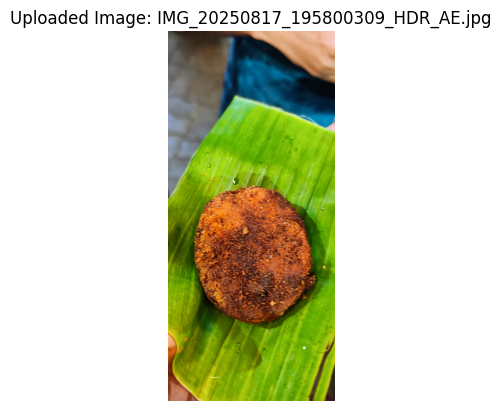


Predicting for image: /content/IMG_20250817_195800309_HDR_AE.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step

Predicted Class: cutlet
Confidence: 0.97
All class probabilities:
  bonda: 0.0225
  vada: 0.0030
  cutlet: 0.9745


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import pathlib
from google.colab import files
import os # For checking if the uploaded file exists
import matplotlib.pyplot as plt # Already imported, but explicitly for plotting
from PIL import Image # Import Pillow for image display

# --- IMPORTANT Setup: Define these based on your trained model and data ---
# Make sure these match the settings used during your model's training!
IMG_HEIGHT = 128
IMG_WIDTH = 128
class_names = ['bonda', 'vada', 'cutlet'] # Your specific class names

# --- Load Your Trained Model (Replace with your actual model loading) ---
# In a real scenario, you would save your model after training (e.g., model.save('my_food_classifier.h5'))
# And then load it here. For demonstration, we'll recreate a dummy model structure.
# If you are running this *after* training the full CNN code in the same session,
# the 'model' object will already be in memory, and you can skip this section.

# Define a dummy model structure matching your trained model, if not loaded
# In a real application, you would load your actual trained weights.
try:
    # Attempt to use the 'model' object if it's already defined from previous cells
    _ = model.summary()
    print("Reusing existing model object.")
except NameError:
    print("Model not found in memory. Defining a dummy model structure for demonstration.")
    # This dummy model needs to match the structure of your *trained* model
    # just enough to define its input/output layers for prediction.
    # It won't have trained weights unless loaded.
    num_classes = len(class_names)
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    # If using this standalone, you MUST load weights:
    # model.load_weights('path_to_your_saved_weights.h5')
    print("Dummy model structure defined. Remember to load actual weights if running standalone.")


# --- Prediction Function ---
def predict_single_image(model, image_path, target_size, class_names):
    """
    Loads an image, preprocesses it, and makes a prediction using the trained model.
    """
    try:
        # Load the image and resize it to the target dimensions
        img = image.load_img(image_path, target_size=target_size)
        # Convert the image to a NumPy array
        img_array = image.img_to_array(img)
        # Add an extra dimension to create a batch of 1 image (expected by model.predict)
        img_array = np.expand_dims(img_array, axis=0)
        # Normalize pixel values (scale from 0-255 to 0-1), same as training
        img_array /= 255.0

        # Make prediction using the trained model
        predictions = model.predict(img_array)
        # Get the index of the class with the highest probability
        predicted_class_index = np.argmax(predictions[0])
        # Get the name of the predicted class
        predicted_class_name = class_names[predicted_class_index]
        # Get the confidence (probability) for the predicted class
        confidence = predictions[0][predicted_class_index]

        return predicted_class_name, confidence, predictions[0]
    except FileNotFoundError:
        print(f"Error: Image not found at {image_path}")
        return None, None, None
    except Exception as e:
        print(f"An error occurred during prediction: {e}")
        return None, None, None

# --- Main Prediction Logic for Desktop Upload ---

print("\n--- Single Image Prediction from Desktop ---")
print("Instructions:")
print("1. A file upload dialog will appear below. Select ONE image from your desktop.")
print("2. Wait for the upload to complete. The filename will be printed.")
print("3. The uploaded image will be displayed, and then the model will attempt to classify it.")

uploaded_image_filename = None

try:
    # This line will open a file selection dialog
    uploaded = files.upload()
    if uploaded:
        # Get the first (and hopefully only) uploaded filename
        uploaded_image_filename = list(uploaded.keys())[0]
        print(f"Uploaded file: {uploaded_image_filename}")
    else:
        print("No file was uploaded.")
except Exception as e:
    print(f"An error occurred during file upload: {e}")
    print("Ensure you are running this in a Google Colab environment and have selected a file.")

if uploaded_image_filename:
    # Construct the full path to the uploaded image in Colab's temporary storage
    uploaded_image_path = pathlib.Path('/content/') / uploaded_image_filename

    # Verify the file actually exists at the expected path
    if uploaded_image_path.exists():
        print(f"\nDisplaying uploaded image: {uploaded_image_path}")
        try:
            # Load and display the image using PIL and Matplotlib
            img_display = Image.open(uploaded_image_path)
            plt.imshow(img_display)
            plt.title(f"Uploaded Image: {uploaded_image_filename}")
            plt.axis('off') # Hide axes
            plt.show() # Display the plot
        except Exception as e:
            print(f"Error displaying image: {e}")

        print(f"\nPredicting for image: {uploaded_image_path}")
        predicted_class, confidence, all_predictions = predict_single_image(
            model, str(uploaded_image_path), (IMG_HEIGHT, IMG_WIDTH), class_names
        )

        if predicted_class:
            print(f"\nPredicted Class: {predicted_class}")
            print(f"Confidence: {confidence:.2f}")
            print("All class probabilities:")
            for i, prob in enumerate(all_predictions):
                print(f"  {class_names[i]}: {prob:.4f}")
        else:
            print("Could not make a prediction for the uploaded image.")
    else:
        print(f"Error: Uploaded file not found at expected path: {uploaded_image_path}")
else:
    print("Prediction skipped as no file was uploaded.")



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,821,067 (148.09 MB)

 Trainable params: 12,940,355 (49.36 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 25,880,712 (98.73 MB)

Reusing existing model object.

--- Single Image Prediction from Desktop ---
Instructions:
1. A file upload dialog will appear below. Select ONE image from your desktop.
2. Wait for the upload to complete. The filename will be printed.
3. The uploaded image will be displayed, and then the model will attempt to classify it.


Saving IMG_20250817_195550079_HDR.jpg to IMG_20250817_195550079_HDR.jpg
Uploaded file: IMG_20250817_195550079_HDR.jpg

Displaying uploaded image: /content/IMG_20250817_195550079_HDR.jpg


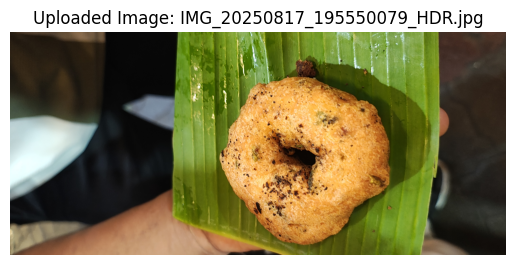


Predicting for image: /content/IMG_20250817_195550079_HDR.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step

Predicted Class: vada
Confidence: 0.99
All class probabilities:
  bonda: 0.0020
  vada: 0.9934
  cutlet: 0.0045


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import pathlib
from google.colab import files
import os # For checking if the uploaded file exists
import matplotlib.pyplot as plt # Already imported, but explicitly for plotting
from PIL import Image # Import Pillow for image display

# --- IMPORTANT Setup: Define these based on your trained model and data ---
# Make sure these match the settings used during your model's training!
IMG_HEIGHT = 128
IMG_WIDTH = 128
class_names = ['bonda', 'vada', 'cutlet'] # Your specific class names

# --- Load Your Trained Model (Replace with your actual model loading) ---
# In a real scenario, you would save your model after training (e.g., model.save('my_food_classifier.h5'))
# And then load it here. For demonstration, we'll recreate a dummy model structure.
# If you are running this *after* training the full CNN code in the same session,
# the 'model' object will already be in memory, and you can skip this section.

# Define a dummy model structure matching your trained model, if not loaded
# In a real application, you would load your actual trained weights.
try:
    # Attempt to use the 'model' object if it's already defined from previous cells
    _ = model.summary()
    print("Reusing existing model object.")
except NameError:
    print("Model not found in memory. Defining a dummy model structure for demonstration.")
    # This dummy model needs to match the structure of your *trained* model
    # just enough to define its input/output layers for prediction.
    # It won't have trained weights unless loaded.
    num_classes = len(class_names)
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    # If using this standalone, you MUST load weights:
    # model.load_weights('path_to_your_saved_weights.h5')
    print("Dummy model structure defined. Remember to load actual weights if running standalone.")


# --- Prediction Function ---
def predict_single_image(model, image_path, target_size, class_names):
    """
    Loads an image, preprocesses it, and makes a prediction using the trained model.
    """
    try:
        # Load the image and resize it to the target dimensions
        img = image.load_img(image_path, target_size=target_size)
        # Convert the image to a NumPy array
        img_array = image.img_to_array(img)
        # Add an extra dimension to create a batch of 1 image (expected by model.predict)
        img_array = np.expand_dims(img_array, axis=0)
        # Normalize pixel values (scale from 0-255 to 0-1), same as training
        img_array /= 255.0

        # Make prediction using the trained model
        predictions = model.predict(img_array)
        # Get the index of the class with the highest probability
        predicted_class_index = np.argmax(predictions[0])
        # Get the name of the predicted class
        predicted_class_name = class_names[predicted_class_index]
        # Get the confidence (probability) for the predicted class
        confidence = predictions[0][predicted_class_index]

        return predicted_class_name, confidence, predictions[0]
    except FileNotFoundError:
        print(f"Error: Image not found at {image_path}")
        return None, None, None
    except Exception as e:
        print(f"An error occurred during prediction: {e}")
        return None, None, None

# --- Main Prediction Logic for Desktop Upload ---

print("\n--- Single Image Prediction from Desktop ---")
print("Instructions:")
print("1. A file upload dialog will appear below. Select ONE image from your desktop.")
print("2. Wait for the upload to complete. The filename will be printed.")
print("3. The uploaded image will be displayed, and then the model will attempt to classify it.")

uploaded_image_filename = None

try:
    # This line will open a file selection dialog
    uploaded = files.upload()
    if uploaded:
        # Get the first (and hopefully only) uploaded filename
        uploaded_image_filename = list(uploaded.keys())[0]
        print(f"Uploaded file: {uploaded_image_filename}")
    else:
        print("No file was uploaded.")
except Exception as e:
    print(f"An error occurred during file upload: {e}")
    print("Ensure you are running this in a Google Colab environment and have selected a file.")

if uploaded_image_filename:
    # Construct the full path to the uploaded image in Colab's temporary storage
    uploaded_image_path = pathlib.Path('/content/') / uploaded_image_filename

    # Verify the file actually exists at the expected path
    if uploaded_image_path.exists():
        print(f"\nDisplaying uploaded image: {uploaded_image_path}")
        try:
            # Load and display the image using PIL and Matplotlib
            img_display = Image.open(uploaded_image_path)
            plt.imshow(img_display)
            plt.title(f"Uploaded Image: {uploaded_image_filename}")
            plt.axis('off') # Hide axes
            plt.show() # Display the plot
        except Exception as e:
            print(f"Error displaying image: {e}")

        print(f"\nPredicting for image: {uploaded_image_path}")
        predicted_class, confidence, all_predictions = predict_single_image(
            model, str(uploaded_image_path), (IMG_HEIGHT, IMG_WIDTH), class_names
        )

        if predicted_class:
            print(f"\nPredicted Class: {predicted_class}")
            print(f"Confidence: {confidence:.2f}")
            print("All class probabilities:")
            for i, prob in enumerate(all_predictions):
                print(f"  {class_names[i]}: {prob:.4f}")
        else:
            print("Could not make a prediction for the uploaded image.")
    else:
        print(f"Error: Uploaded file not found at expected path: {uploaded_image_path}")
else:
    print("Prediction skipped as no file was uploaded.")



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,821,067 (148.09 MB)

 Trainable params: 12,940,355 (49.36 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 25,880,712 (98.73 MB)

Reusing existing model object.

--- Single Image Prediction from Desktop ---
Instructions:
1. A file upload dialog will appear below. Select ONE image from your desktop.
2. Wait for the upload to complete. The filename will be printed.
3. The uploaded image will be displayed, and then the model will attempt to classify it.


Saving IMG_20250817_195843856.jpg to IMG_20250817_195843856.jpg
Uploaded file: IMG_20250817_195843856.jpg

Displaying uploaded image: /content/IMG_20250817_195843856.jpg


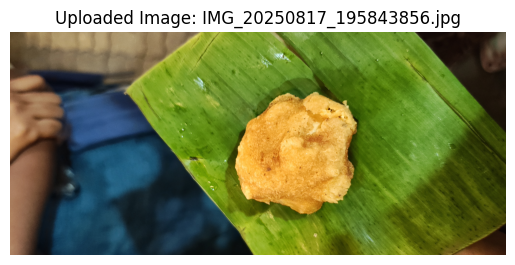


Predicting for image: /content/IMG_20250817_195843856.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step

Predicted Class: bonda
Confidence: 1.00
All class probabilities:
  bonda: 0.9993
  vada: 0.0000
  cutlet: 0.0007


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import pathlib
from google.colab import files
import os # For checking if the uploaded file exists
import matplotlib.pyplot as plt # Already imported, but explicitly for plotting
from PIL import Image # Import Pillow for image display

# --- IMPORTANT Setup: Define these based on your trained model and data ---
# Make sure these match the settings used during your model's training!
IMG_HEIGHT = 128
IMG_WIDTH = 128
class_names = ['bonda', 'vada', 'cutlet'] # Your specific class names

# --- Load Your Trained Model (Replace with your actual model loading) ---
# In a real scenario, you would save your model after training (e.g., model.save('my_food_classifier.h5'))
# And then load it here. For demonstration, we'll recreate a dummy model structure.
# If you are running this *after* training the full CNN code in the same session,
# the 'model' object will already be in memory, and you can skip this section.

# Define a dummy model structure matching your trained model, if not loaded
# In a real application, you would load your actual trained weights.
try:
    # Attempt to use the 'model' object if it's already defined from previous cells
    _ = model.summary()
    print("Reusing existing model object.")
except NameError:
    print("Model not found in memory. Defining a dummy model structure for demonstration.")
    # This dummy model needs to match the structure of your *trained* model
    # just enough to define its input/output layers for prediction.
    # It won't have trained weights unless loaded.
    num_classes = len(class_names)
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    # If using this standalone, you MUST load weights:
    # model.load_weights('path_to_your_saved_weights.h5')
    print("Dummy model structure defined. Remember to load actual weights if running standalone.")


# --- Prediction Function ---
def predict_single_image(model, image_path, target_size, class_names):
    """
    Loads an image, preprocesses it, and makes a prediction using the trained model.
    """
    try:
        # Load the image and resize it to the target dimensions
        img = image.load_img(image_path, target_size=target_size)
        # Convert the image to a NumPy array
        img_array = image.img_to_array(img)
        # Add an extra dimension to create a batch of 1 image (expected by model.predict)
        img_array = np.expand_dims(img_array, axis=0)
        # Normalize pixel values (scale from 0-255 to 0-1), same as training
        img_array /= 255.0

        # Make prediction using the trained model
        predictions = model.predict(img_array)
        # Get the index of the class with the highest probability
        predicted_class_index = np.argmax(predictions[0])
        # Get the name of the predicted class
        predicted_class_name = class_names[predicted_class_index]
        # Get the confidence (probability) for the predicted class
        confidence = predictions[0][predicted_class_index]

        return predicted_class_name, confidence, predictions[0]
    except FileNotFoundError:
        print(f"Error: Image not found at {image_path}")
        return None, None, None
    except Exception as e:
        print(f"An error occurred during prediction: {e}")
        return None, None, None

# --- Main Prediction Logic for Desktop Upload ---

print("\n--- Single Image Prediction from Desktop ---")
print("Instructions:")
print("1. A file upload dialog will appear below. Select ONE image from your desktop.")
print("2. Wait for the upload to complete. The filename will be printed.")
print("3. The uploaded image will be displayed, and then the model will attempt to classify it.")

uploaded_image_filename = None

try:
    # This line will open a file selection dialog
    uploaded = files.upload()
    if uploaded:
        # Get the first (and hopefully only) uploaded filename
        uploaded_image_filename = list(uploaded.keys())[0]
        print(f"Uploaded file: {uploaded_image_filename}")
    else:
        print("No file was uploaded.")
except Exception as e:
    print(f"An error occurred during file upload: {e}")
    print("Ensure you are running this in a Google Colab environment and have selected a file.")

if uploaded_image_filename:
    # Construct the full path to the uploaded image in Colab's temporary storage
    uploaded_image_path = pathlib.Path('/content/') / uploaded_image_filename

    # Verify the file actually exists at the expected path
    if uploaded_image_path.exists():
        print(f"\nDisplaying uploaded image: {uploaded_image_path}")
        try:
            # Load and display the image using PIL and Matplotlib
            img_display = Image.open(uploaded_image_path)
            plt.imshow(img_display)
            plt.title(f"Uploaded Image: {uploaded_image_filename}")
            plt.axis('off') # Hide axes
            plt.show() # Display the plot
        except Exception as e:
            print(f"Error displaying image: {e}")

        print(f"\nPredicting for image: {uploaded_image_path}")
        predicted_class, confidence, all_predictions = predict_single_image(
            model, str(uploaded_image_path), (IMG_HEIGHT, IMG_WIDTH), class_names
        )

        if predicted_class:
            print(f"\nPredicted Class: {predicted_class}")
            print(f"Confidence: {confidence:.2f}")
            print("All class probabilities:")
            for i, prob in enumerate(all_predictions):
                print(f"  {class_names[i]}: {prob:.4f}")
        else:
            print("Could not make a prediction for the uploaded image.")
    else:
        print(f"Error: Uploaded file not found at expected path: {uploaded_image_path}")
else:
    print("Prediction skipped as no file was uploaded.")



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,821,067 (148.09 MB)

 Trainable params: 12,940,355 (49.36 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 25,880,712 (98.73 MB)

Reusing existing model object.

--- Single Image Prediction from Desktop ---
Instructions:
1. A file upload dialog will appear below. Select ONE image from your desktop.
2. Wait for the upload to complete. The filename will be printed.
3. The uploaded image will be displayed, and then the model will attempt to classify it.


Saving photo_3.jpg to photo_3.jpg
Uploaded file: photo_3.jpg

Displaying uploaded image: /content/photo_3.jpg


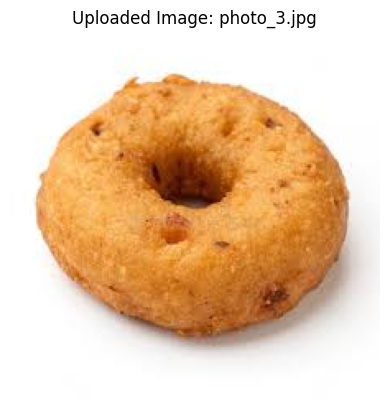


Predicting for image: /content/photo_3.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step

Predicted Class: vada
Confidence: 0.97
All class probabilities:
  bonda: 0.0025
  vada: 0.9723
  cutlet: 0.0253


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import pathlib
from google.colab import files
import os # For checking if the uploaded file exists
import matplotlib.pyplot as plt # Already imported, but explicitly for plotting
from PIL import Image # Import Pillow for image display

# --- IMPORTANT Setup: Define these based on your trained model and data ---
# Make sure these match the settings used during your model's training!
IMG_HEIGHT = 128
IMG_WIDTH = 128
class_names = ['bonda', 'vada', 'cutlet'] # Your specific class names

# --- Load Your Trained Model (Replace with your actual model loading) ---
# In a real scenario, you would save your model after training (e.g., model.save('my_food_classifier.h5'))
# And then load it here. For demonstration, we'll recreate a dummy model structure.
# If you are running this *after* training the full CNN code in the same session,
# the 'model' object will already be in memory, and you can skip this section.

# Define a dummy model structure matching your trained model, if not loaded
# In a real application, you would load your actual trained weights.
try:
    # Attempt to use the 'model' object if it's already defined from previous cells
    _ = model.summary()
    print("Reusing existing model object.")
except NameError:
    print("Model not found in memory. Defining a dummy model structure for demonstration.")
    # This dummy model needs to match the structure of your *trained* model
    # just enough to define its input/output layers for prediction.
    # It won't have trained weights unless loaded.
    num_classes = len(class_names)
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    # If using this standalone, you MUST load weights:
    # model.load_weights('path_to_your_saved_weights.h5')
    print("Dummy model structure defined. Remember to load actual weights if running standalone.")


# --- Prediction Function ---
def predict_single_image(model, image_path, target_size, class_names):
    """
    Loads an image, preprocesses it, and makes a prediction using the trained model.
    """
    try:
        # Load the image and resize it to the target dimensions
        img = image.load_img(image_path, target_size=target_size)
        # Convert the image to a NumPy array
        img_array = image.img_to_array(img)
        # Add an extra dimension to create a batch of 1 image (expected by model.predict)
        img_array = np.expand_dims(img_array, axis=0)
        # Normalize pixel values (scale from 0-255 to 0-1), same as training
        img_array /= 255.0

        # Make prediction using the trained model
        predictions = model.predict(img_array)
        # Get the index of the class with the highest probability
        predicted_class_index = np.argmax(predictions[0])
        # Get the name of the predicted class
        predicted_class_name = class_names[predicted_class_index]
        # Get the confidence (probability) for the predicted class
        confidence = predictions[0][predicted_class_index]

        return predicted_class_name, confidence, predictions[0]
    except FileNotFoundError:
        print(f"Error: Image not found at {image_path}")
        return None, None, None
    except Exception as e:
        print(f"An error occurred during prediction: {e}")
        return None, None, None

# --- Main Prediction Logic for Desktop Upload ---

print("\n--- Single Image Prediction from Desktop ---")
print("Instructions:")
print("1. A file upload dialog will appear below. Select ONE image from your desktop.")
print("2. Wait for the upload to complete. The filename will be printed.")
print("3. The uploaded image will be displayed, and then the model will attempt to classify it.")

uploaded_image_filename = None

try:
    # This line will open a file selection dialog
    uploaded = files.upload()
    if uploaded:
        # Get the first (and hopefully only) uploaded filename
        uploaded_image_filename = list(uploaded.keys())[0]
        print(f"Uploaded file: {uploaded_image_filename}")
    else:
        print("No file was uploaded.")
except Exception as e:
    print(f"An error occurred during file upload: {e}")
    print("Ensure you are running this in a Google Colab environment and have selected a file.")

if uploaded_image_filename:
    # Construct the full path to the uploaded image in Colab's temporary storage
    uploaded_image_path = pathlib.Path('/content/') / uploaded_image_filename

    # Verify the file actually exists at the expected path
    if uploaded_image_path.exists():
        print(f"\nDisplaying uploaded image: {uploaded_image_path}")
        try:
            # Load and display the image using PIL and Matplotlib
            img_display = Image.open(uploaded_image_path)
            plt.imshow(img_display)
            plt.title(f"Uploaded Image: {uploaded_image_filename}")
            plt.axis('off') # Hide axes
            plt.show() # Display the plot
        except Exception as e:
            print(f"Error displaying image: {e}")

        print(f"\nPredicting for image: {uploaded_image_path}")
        predicted_class, confidence, all_predictions = predict_single_image(
            model, str(uploaded_image_path), (IMG_HEIGHT, IMG_WIDTH), class_names
        )

        if predicted_class:
            print(f"\nPredicted Class: {predicted_class}")
            print(f"Confidence: {confidence:.2f}")
            print("All class probabilities:")
            for i, prob in enumerate(all_predictions):
                print(f"  {class_names[i]}: {prob:.4f}")
        else:
            print("Could not make a prediction for the uploaded image.")
    else:
        print(f"Error: Uploaded file not found at expected path: {uploaded_image_path}")
else:
    print("Prediction skipped as no file was uploaded.")



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,821,067 (148.09 MB)

 Trainable params: 12,940,355 (49.36 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 25,880,712 (98.73 MB)

Reusing existing model object.

--- Single Image Prediction from Desktop ---
Instructions:
1. A file upload dialog will appear below. Select ONE image from your desktop.
2. Wait for the upload to complete. The filename will be printed.
3. The uploaded image will be displayed, and then the model will attempt to classify it.


Saving Paneer Vegetable Cutlets.jpg to Paneer Vegetable Cutlets.jpg
Uploaded file: Paneer Vegetable Cutlets.jpg

Displaying uploaded image: /content/Paneer Vegetable Cutlets.jpg


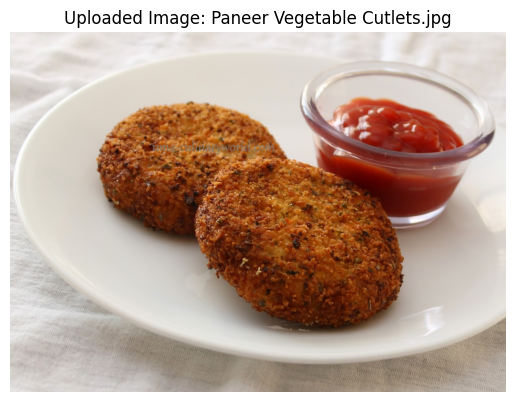


Predicting for image: /content/Paneer Vegetable Cutlets.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step

Predicted Class: vada
Confidence: 0.98
All class probabilities:
  bonda: 0.0001
  vada: 0.9792
  cutlet: 0.0207


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import pathlib
from google.colab import files
import os # For checking if the uploaded file exists
import matplotlib.pyplot as plt # Already imported, but explicitly for plotting
from PIL import Image # Import Pillow for image display

# --- IMPORTANT Setup: Define these based on your trained model and data ---
# Make sure these match the settings used during your model's training!
IMG_HEIGHT = 128
IMG_WIDTH = 128
class_names = ['bonda', 'vada', 'cutlet'] # Your specific class names

# --- Load Your Trained Model (Replace with your actual model loading) ---
# In a real scenario, you would save your model after training (e.g., model.save('my_food_classifier.h5'))
# And then load it here. For demonstration, we'll recreate a dummy model structure.
# If you are running this *after* training the full CNN code in the same session,
# the 'model' object will already be in memory, and you can skip this section.

# Define a dummy model structure matching your trained model, if not loaded
# In a real application, you would load your actual trained weights.
try:
    # Attempt to use the 'model' object if it's already defined from previous cells
    _ = model.summary()
    print("Reusing existing model object.")
except NameError:
    print("Model not found in memory. Defining a dummy model structure for demonstration.")
    # This dummy model needs to match the structure of your *trained* model
    # just enough to define its input/output layers for prediction.
    # It won't have trained weights unless loaded.
    num_classes = len(class_names)
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    # If using this standalone, you MUST load weights:
    # model.load_weights('path_to_your_saved_weights.h5')
    print("Dummy model structure defined. Remember to load actual weights if running standalone.")


# --- Prediction Function ---
def predict_single_image(model, image_path, target_size, class_names):
    """
    Loads an image, preprocesses it, and makes a prediction using the trained model.
    """
    try:
        # Load the image and resize it to the target dimensions
        img = image.load_img(image_path, target_size=target_size)
        # Convert the image to a NumPy array
        img_array = image.img_to_array(img)
        # Add an extra dimension to create a batch of 1 image (expected by model.predict)
        img_array = np.expand_dims(img_array, axis=0)
        # Normalize pixel values (scale from 0-255 to 0-1), same as training
        img_array /= 255.0

        # Make prediction using the trained model
        predictions = model.predict(img_array)
        # Get the index of the class with the highest probability
        predicted_class_index = np.argmax(predictions[0])
        # Get the name of the predicted class
        predicted_class_name = class_names[predicted_class_index]
        # Get the confidence (probability) for the predicted class
        confidence = predictions[0][predicted_class_index]

        return predicted_class_name, confidence, predictions[0]
    except FileNotFoundError:
        print(f"Error: Image not found at {image_path}")
        return None, None, None
    except Exception as e:
        print(f"An error occurred during prediction: {e}")
        return None, None, None

# --- Main Prediction Logic for Desktop Upload ---

print("\n--- Single Image Prediction from Desktop ---")
print("Instructions:")
print("1. A file upload dialog will appear below. Select ONE image from your desktop.")
print("2. Wait for the upload to complete. The filename will be printed.")
print("3. The uploaded image will be displayed, and then the model will attempt to classify it.")

uploaded_image_filename = None

try:
    # This line will open a file selection dialog
    uploaded = files.upload()
    if uploaded:
        # Get the first (and hopefully only) uploaded filename
        uploaded_image_filename = list(uploaded.keys())[0]
        print(f"Uploaded file: {uploaded_image_filename}")
    else:
        print("No file was uploaded.")
except Exception as e:
    print(f"An error occurred during file upload: {e}")
    print("Ensure you are running this in a Google Colab environment and have selected a file.")

if uploaded_image_filename:
    # Construct the full path to the uploaded image in Colab's temporary storage
    uploaded_image_path = pathlib.Path('/content/') / uploaded_image_filename

    # Verify the file actually exists at the expected path
    if uploaded_image_path.exists():
        print(f"\nDisplaying uploaded image: {uploaded_image_path}")
        try:
            # Load and display the image using PIL and Matplotlib
            img_display = Image.open(uploaded_image_path)
            plt.imshow(img_display)
            plt.title(f"Uploaded Image: {uploaded_image_filename}")
            plt.axis('off') # Hide axes
            plt.show() # Display the plot
        except Exception as e:
            print(f"Error displaying image: {e}")

        print(f"\nPredicting for image: {uploaded_image_path}")
        predicted_class, confidence, all_predictions = predict_single_image(
            model, str(uploaded_image_path), (IMG_HEIGHT, IMG_WIDTH), class_names
        )

        if predicted_class:
            print(f"\nPredicted Class: {predicted_class}")
            print(f"Confidence: {confidence:.2f}")
            print("All class probabilities:")
            for i, prob in enumerate(all_predictions):
                print(f"  {class_names[i]}: {prob:.4f}")
        else:
            print("Could not make a prediction for the uploaded image.")
    else:
        print(f"Error: Uploaded file not found at expected path: {uploaded_image_path}")
else:
    print("Prediction skipped as no file was uploaded.")

